<a href="https://colab.research.google.com/github/Yasir323/100-days-of-code/blob/master/OOP1_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Minimal Class

In [1]:
class Robot:
    pass

if __name__ == "__main__":
    x = Robot()
    y = Robot()
    y2 = y
    print(y == y2)
    print(y == x)

True
False


### Attributes
Attributes are created inside a class definition, as we will soon learn. We can dynamically create arbitrary new attributes for existing instances of a class.

In [2]:
class Robot:
    pass

x = Robot()
y = Robot()
 
x.name = "Marvin"
x.build_year = "1979"
 
y.name = "Caliban"
y.build_year = "1993"
 
print(x.name)

Marvin


Binding attributes to objects is a general concept in Python. Even function names can be attributed. You can bind an attribute to a function name in the same way, we have done so far to other instances of classes:

In [3]:
def f(x):
    return 42
 
f.x = 42
print(f.x)

42


### Methods
Methods in Python are essentially functions in accordance with Guido's saying "first-class everything".

In [4]:
def hi(obj):
    print("Hi, I am " + obj.name + "!")

class Robot:
    pass
    

x = Robot()
x.name = "Marvin"
hi(x)

Hi, I am Marvin!


### The __init__ Method

We want to define the attributes of an instance right after its creation. __init__ is a method which is immediately and automatically called after an instance has been created. This name is fixed and it is not possible to chose another name. __init__ is one of the so-called magic methods,we will get to know it with some more details later. The __init__ method is used to initialize an instance. ***There is no explicit constructor or destructor method in Python, as they are known in C++ and Java***. The __init__ method can be anywhere in a class definition, but it is usually the first method of a class, i.e. it follows right after the class header.

In [5]:
class A:
    def __init__(self):
        print("__init__ has been executed!")

x = A()

__init__ has been executed!


In [6]:
class Robot:
 
    def __init__(self, name=None):
        self.name = name   
        
    def say_hi(self):
        if self.name:
            print("Hi, I am " + self.name)
        else:
            print("Hi, I am a robot without a name")
    

x = Robot()
x.say_hi()
y = Robot("Marvin")
y.say_hi()

Hi, I am a robot without a name
Hi, I am Marvin


## Data Abstraction, Data Encapsulation, and Information Hiding

**Encapsulation** is seen as the bundling of data with the methods that operate on that data. **Information hiding** on the other hand is the principle that some internal information or data is "hidden", so that it can't be accidentally changed. Data encapsulation via methods doesn't necessarily mean that the data is hidden. You might be capable of accessing and seeing the data anyway, but using the methods is recommended. Finally, **data abstraction** is present, if both data hiding and data encapsulation is used. In other words, data abstraction is the broader term:

Data Abstraction = Data Encapsulation + Data Hiding

Encapsulation is often accomplished by providing two kinds of methods for attributes: The methods for retrieving or accessing the values of attributes are called getter methods. Getter methods do not change the values of attributes, they just return the values. The methods used for changing the values of attributes are called setter methods.

In [7]:
class Robot:
 
    def __init__(self, name=None):
        self.name = name   
        
    def say_hi(self):
        if self.name:
            print("Hi, I am " + self.name)
        else:
            print("Hi, I am a robot without a name")
            
    def set_name(self, name):
        self.name = name
        
    def get_name(self):
        return self.name

In [8]:
x = Robot()
x.set_name("Henry")
x.say_hi()
y = Robot()
y.set_name(x.get_name())
print(y.get_name())

Hi, I am Henry
Henry


In [9]:
class Robot:
 
    def __init__(self, 
                 name=None,
                 build_year=None):
        self.name = name   
        self.build_year = build_year
        
    def say_hi(self):
        if self.name:
            print("Hi, I am " + self.name)
        else:
            print("Hi, I am a robot without a name")
        if self.build_year:
            print("I was built in " + str(self.build_year))
        else:
            print("It's not known, when I was created!")
            
    def set_name(self, name):
        self.name = name
        
    def get_name(self):
        return self.name    

    def set_build_year(self, by):
        self.build_year = by
        
    def get_build_year(self):
        return self.build_year

In [10]:
x = Robot("Henry", 2008)
y = Robot()
y.set_name("Marvin")
x.say_hi()
y.say_hi()

Hi, I am Henry
I was built in 2008
Hi, I am Marvin
It's not known, when I was created!


There is still something wrong with our Robot class. The Zen of Python says: "There should be one-- and preferably only one --obvious way to do it." Our Robot class provides us with two ways to access or to change the "name" or the "build_year" attribute. This can be prevented by using private attributes, which we will explain later.

## __ str __ () and __ repr __ () Methods
In the course of this tutorial, we have already encountered the __str__ method. We had seen that we can depict various data as string by using the str function, which uses "magically" the internal __str__ method of the corresponding data type. __repr__ is similar. It also produces a string representation.

In [11]:
l = ["Python", "Java", "C++", "Perl"]
print(l)

['Python', 'Java', 'C++', 'Perl']


In [12]:
str(l)

"['Python', 'Java', 'C++', 'Perl']"

In [13]:
repr(l)

"['Python', 'Java', 'C++', 'Perl']"

In [14]:
d = {"a":3497, "b":8011, "c":8300}
print(d)

{'a': 3497, 'b': 8011, 'c': 8300}


In [15]:
str(d)

"{'a': 3497, 'b': 8011, 'c': 8300}"

In [16]:
repr(d)

"{'a': 3497, 'b': 8011, 'c': 8300}"

In [17]:
x = 587.78
str(x)

'587.78'

In [18]:
repr(x)

'587.78'



If you apply str or repr to an object, Python is looking for a corresponding method __str__ or __repr__ in the class definition of the object. If the method does exist, it will be called. In the following example, we define a class A, having neither a __str__ nor a __repr__ method. We want to see, what happens, if we use print directly on an instance of this class, or if we apply str or repr to this instance:


In [19]:
class A:
    pass

a = A()
print(a)  ## Calls the __str__ method

In [20]:
print(repr(a))  # Calls the __repr__ method

In [21]:
print(str(a))  # Calls the __str__ method

In [22]:
a  # Calls the __repr__ method

*If a class has a __str__ method, the method will be used for an instance x of that class, if either the function str is applied to it or if it is used in a print function. __str__ will not be used, if repr is called, or if we try to output the value directly in an interactive Python shell*:

In [23]:
class A:
    def __str__(self):
        return "42"

a = A()
print(repr(a))  # __repr__
print(str(a))  # __str__
print(a)  # __str__

42
42


In [24]:
a  # __repr__

Otherwise, if a class has only the __repr__ method and no __str__ method, __repr__ will be applied in the situations, where __str__ would be applied, if it were available:

In [25]:
class B:
    def __repr__(self):
        return "42"

b = B()
print(b)  # __str__ but since it is not present, __repr__ will be called
print(repr(b))  # __repr__
print(str(b))  # __str__ but since it is not present, __repr__ will be called
b  # __repr__

42
42
42


42



A frequently asked question is when to use __repr__ and when __str__. __str__ is always the right choice, if the output should be for the end user or in other words, if it should be nicely printed. __repr__ on the other hand is used for the internal representation of an object. The output of __repr__ should be - if feasible - a string which can be parsed by the python interpreter. The result of this parsing is in an equal object. That is, the following should be true for an object "o":

 $o == eval(repr(o))$

In [26]:
l = [3,8,9]
s = repr(l)
s

'[3, 8, 9]'

In [27]:
l == eval(s)

True

In [28]:
l == eval(str(l))

True

*We show in the following example with the datetime module that eval can only be applied on the strings created by repr*:

In [29]:
import datetime

try:
    today = datetime.datetime.now()
    str_s = str(today)
    eval(str_s)
except SyntaxError as e:
    print("Syntax Error, as eval(str_s) cannot convert str_s back to a datetime object.\nSince it is in a string representation.")

Syntax Error, as eval(str_s) cannot convert str_s back to a datetime object.
Since it is in a string representation.


In [30]:
repr_s = repr(today)
t = eval(repr_s)
type(t)

datetime.datetime

We can see that eval(repr_s) returns again a datetime.datetime object. The string created by str can't be turned into a datetime.datetime object by parsing it.

In [31]:
class Robot:

    def __init__(self, name, build_year):
        self.name = name
        self.build_year = build_year

    def __repr__(self):
        return "Robot(\"" + self.name + "\"," +  str(self.build_year) +  ")"

    def __str__(self):
        return "Name: " + self.name + ", Build Year: " +  str(self.build_year)
     
if __name__ == "__main__":
    x = Robot("Marvin", 1979)
    
    x_repr = repr(x)
    print(x_repr, type(x_repr))
    new = eval(x_repr)
    print(new)
    print("Type of new:", type(new))

Robot("Marvin",1979) <class 'str'>
Name: Marvin, Build Year: 1979
Type of new: <class '__main__.Robot'>


## Public, - Protected-, and Private Attributes

*    Private attributes should only be used by the owner, i.e. inside of the class definition itself.
*    Protected (restricted) Attributes may be used, but at your own risk. Essentially, they should only be used under certain conditions.
*    Public Attributes can and should be freely used.

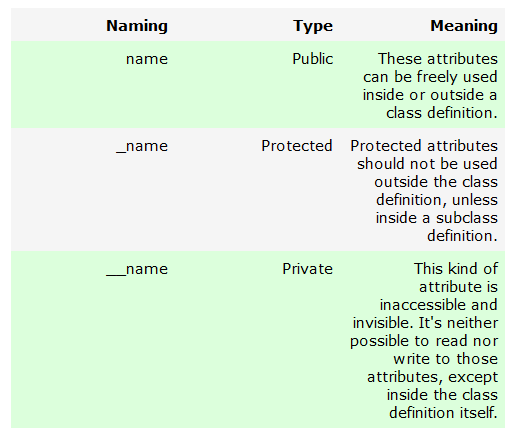

In [32]:
class A():
    
    def __init__(self):
        self.__priv = "I am private"
        self._prot = "I am protected"
        self.pub = "I am public"

In [33]:
x = A()
x.pub

'I am public'

In [34]:
x.pub = x.pub + " and my value can be changed"
x.pub

'I am public and my value can be changed'

In [35]:
x._prot

'I am protected'

In [36]:
try:
    x.__priv
except AttributeError:
    print("A' object has no attribute '__priv")
    print('In other words, __priv is a private attribute and\ncannot be accessed putside the class')

A' object has no attribute '__priv
In other words, __priv is a private attribute and
cannot be accessed putside the class


The error message is very interesting. One might have expected a message like "__priv is private". We get the message "AttributeError: 'A' object has no attribute __priv instead, which looks like a "lie". There is such an attribute, but we are told that there isn't. This is perfect information hiding. Telling a user that an attribute name is private, means that we make some information visible, i.e. the existence or non-existence of a private variable.

In [37]:
class Robot:
 
    def __init__(self, name=None, build_year=2000):
        self.__name = name
        self.__build_year = build_year
        
    def say_hi(self):
        if self.__name:
            print("Hi, I am " + self.__name)
        else:
            print("Hi, I am a robot without a name")
            
    def set_name(self, name):
        self.__name = name
        
    def get_name(self):
        return self.__name    

    def set_build_year(self, by):
        self.__build_year = by
        
    def get_build_year(self):
        return self.__build_year    
    
    def __repr__(self):
        return "Robot('" + self.__name + "', " +  str(self.__build_year) +  ")"

    def __str__(self):
        return "Name: " + self.__name + ", Build Year: " +  str(self.__build_year)

     
if __name__ == "__main__":
    x = Robot("Marvin", 1979)
    y = Robot("Caliban", 1943)
    for rob in [x, y]:
        rob.say_hi()
        if rob.get_name() == "Caliban":
            rob.set_build_year(1993)
        print("I was built in the year " + str(rob.get_build_year()) + "!")

Hi, I am Marvin
I was built in the year 1979!
Hi, I am Caliban
I was built in the year 1993!


Every private attribute of our class has a getter and a setter. There are IDEs for object-oriented programming languages, who automatically provide getters and setters for every private attribute as soon as an attribute is created.

This may look like the following class:

In [38]:
class A():

    def __init__(self, x, y):
        self.__x = x
        self.__y = y

    def GetX(self):
        return self.__x

    def GetY(self):
        return self.__y

    def SetX(self, x):
        self.__x = x

    def SetY(self, y):
        self.__y = y

*There are at least two good reasons against such an approach. First of all not every private attribute needs to be accessed from outside. Second, we will create non-pythonic code this way, as you will learn soon.*

## Destructor
What we said about constructors holds true for destructors as well. There is no "real" destructor, but something similar, i.e. the method dunder del. It is called when the instance is about to be destroyed and if there is no other reference to this instance. If a base class has a \_\_del\_\_() method, the derived class's \_\_del\_\_() method, if any, must explicitly call it to ensure proper deletion of the base class part of the instance.

The following script is an example with \_\_init\_\_ and \_\_del\_\_:

In [39]:
class Robot():
    
    def __init__(self, name):
        print(name + " has been created!")
        
    def __del__(self):
        print ("Robot has been destroyed")
        
        
if __name__ == "__main__":
    x = Robot("Tik-Tok")
    y = Robot("Jenkins")
    z = x
    print("Deleting x")
    del x
    print("Deleting z")
    del z
    del y

Tik-Tok has been created!
Jenkins has been created!
Deleting x
Deleting z
Robot has been destroyed
Robot has been destroyed


In [40]:
class Robot():
    
    def __init__(self, name):
        print(name + " has been created!")
        
    def __del__(self):
        print (self.name + " says bye-bye!")
        
        
if __name__ == "__main__":
    x = Robot("Tik-Tok")
    y = Robot("Jenkins")
    z = x
    print("Deleting x")
    del x
    print("Deleting z")
    try:
        del z
        del y
    except AttributeError as e:
        pass

Tik-Tok has been created!
Jenkins has been created!
Deleting x
Deleting z


Exception ignored in: <function Robot.__del__ at 0x7fe4ec5e4cb0>
Traceback (most recent call last):
  File "<ipython-input-40-8e1c5044248c>", line 7, in __del__
AttributeError: 'Robot' object has no attribute 'name'
Exception ignored in: <function Robot.__del__ at 0x7fe4ec5e4cb0>
Traceback (most recent call last):
  File "<ipython-input-40-8e1c5044248c>", line 7, in __del__
AttributeError: 'Robot' object has no attribute 'name'
